#### 导入数据

In [103]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
# 读取CSV文件为一个DataFrame对象
df = pd.read_csv('dataset\Aquifer\Aquifer_Auser.csv')

data_info = df.info()
data_description = df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

#### 数据预处理  


##### 数据可视化
数据

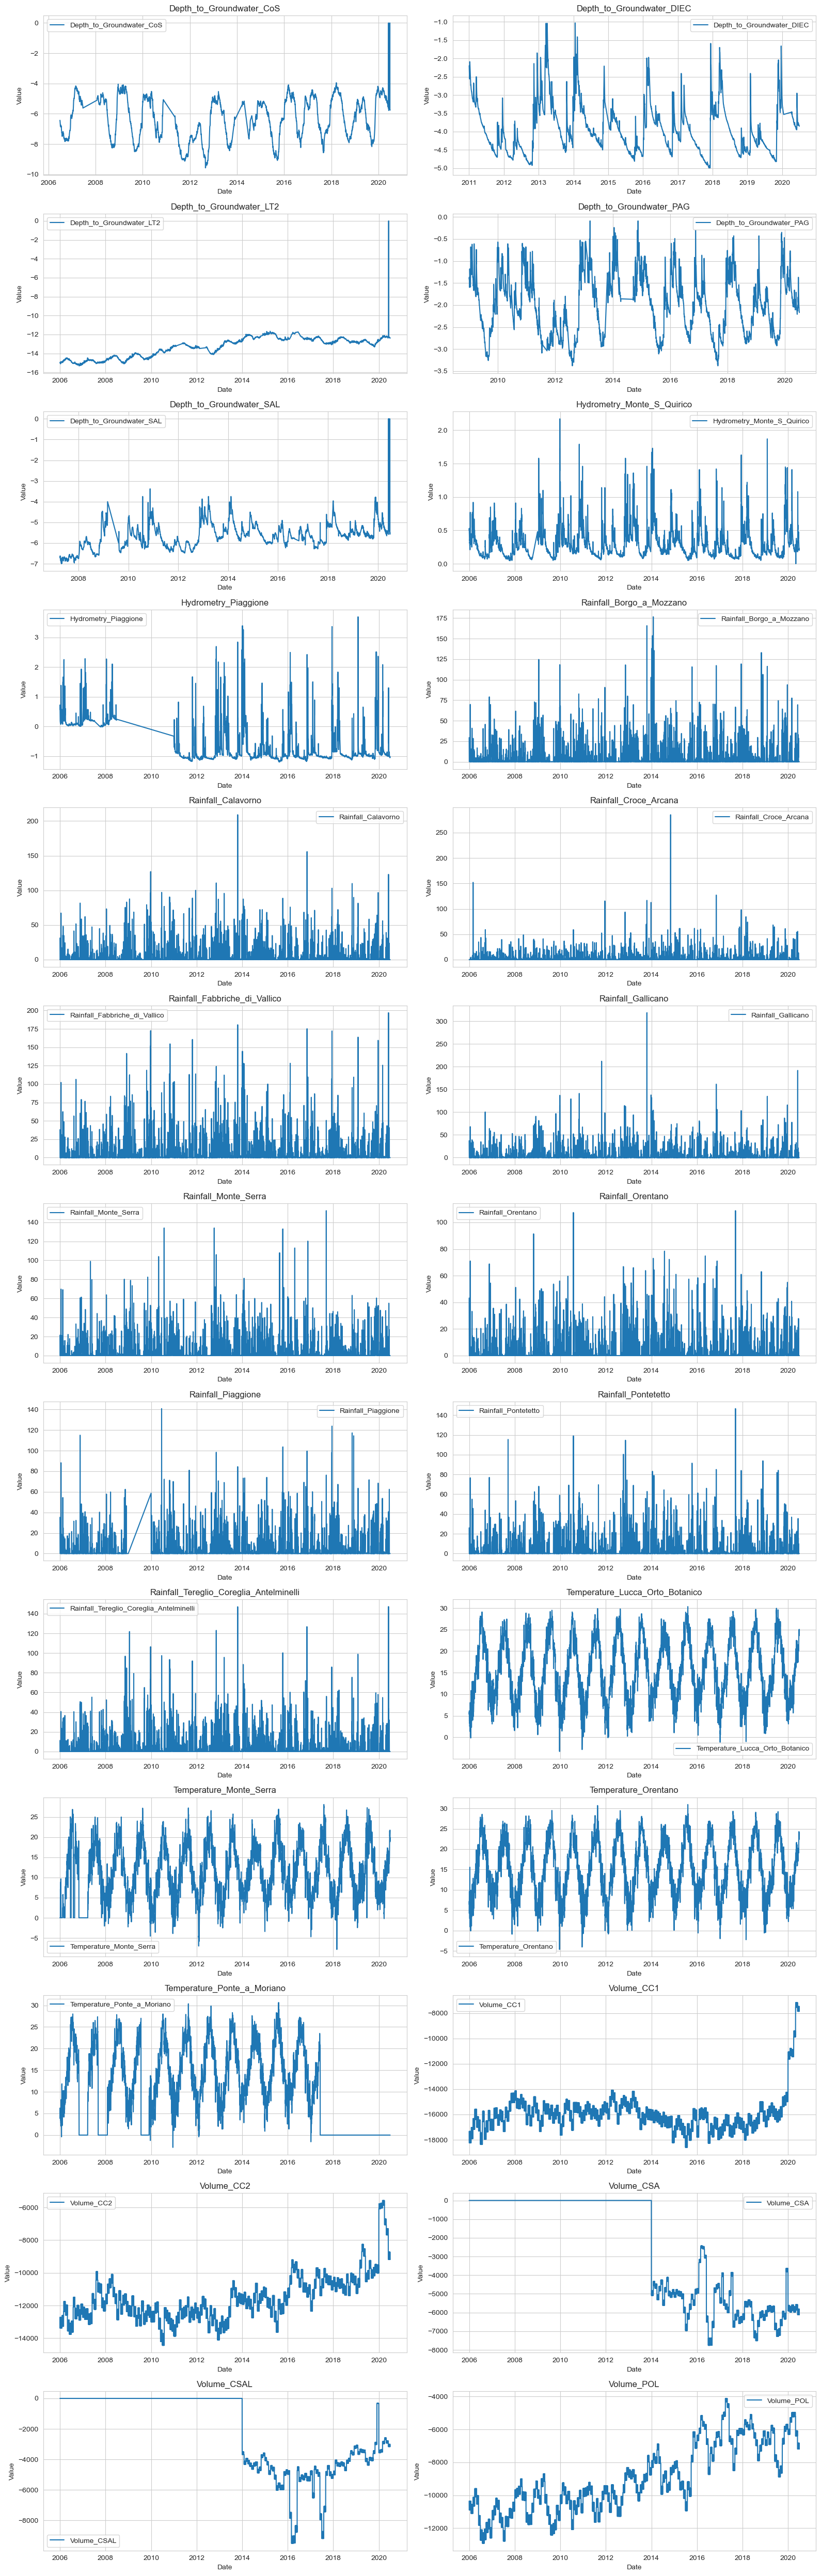

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件为一个DataFrame对象
df = pd.read_csv('dataset\Aquifer\Aquifer_Auser.csv')

# 设置日期列为索引，去除2006-01-01之前的数据
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df = df['2006-01-01':]

# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])
# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()


我们可以看到，首先需要处理的是缺失值问题  

Rainfall_Gallicano                            0
Rainfall_Pontetetto                           0
Rainfall_Monte_Serra                          6
Rainfall_Orentano                             0
Rainfall_Borgo_a_Mozzano                      0
Rainfall_Piaggione                          365
Rainfall_Calavorno                            0
Rainfall_Croce_Arcana                         0
Rainfall_Tereglio_Coreglia_Antelminelli       0
Rainfall_Fabbriche_di_Vallico                 0
Depth_to_Groundwater_LT2                    493
Depth_to_Groundwater_SAL                    750
Depth_to_Groundwater_PAG                   1488
Depth_to_Groundwater_CoS                    980
Depth_to_Groundwater_DIEC                  2025
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                                    0
Volume_CC1                              

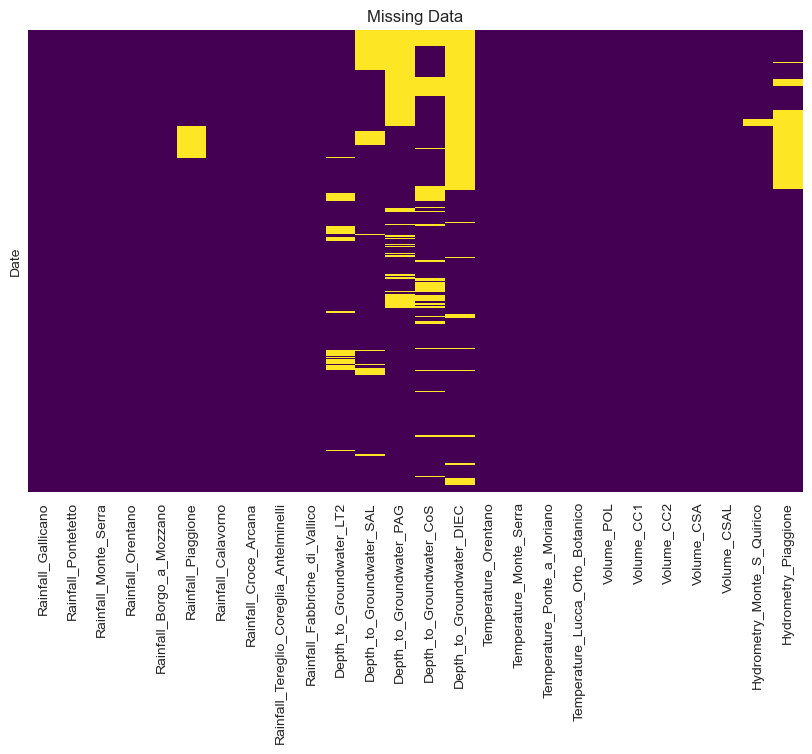

In [106]:
# 检测缺失值
missing_data = df.isnull().sum()

# 打印缺失值情况
print(missing_data)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data')
plt.show()


先对缺失值做基本的线性填充  将异常值处理

In [107]:
# 列名列表
columns_to_replace_zero = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
                            'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC', 'Temperature_Orentano']

# 将值为0的数据替换为NaN
df[columns_to_replace_zero] = df[columns_to_replace_zero].replace(0, float('nan'))


# 使用线性填充来填补缺失值
df = df.interpolate(method='linear')

# 查看填充后的DataFrame的缺失值情况
missing_data_filled = df.isnull().sum()

# 打印填充后的缺失值情况
print(missing_data_filled)

Rainfall_Gallicano                            0
Rainfall_Pontetetto                           0
Rainfall_Monte_Serra                          0
Rainfall_Orentano                             0
Rainfall_Borgo_a_Mozzano                      0
Rainfall_Piaggione                            0
Rainfall_Calavorno                            0
Rainfall_Croce_Arcana                         0
Rainfall_Tereglio_Coreglia_Antelminelli       0
Rainfall_Fabbriche_di_Vallico                 0
Depth_to_Groundwater_LT2                      0
Depth_to_Groundwater_SAL                    460
Depth_to_Groundwater_PAG                   1096
Depth_to_Groundwater_CoS                    179
Depth_to_Groundwater_DIEC                  1827
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                                    0
Volume_CC1                              

扔弃掉标签中仍然缺失的行

In [108]:
# 删除仍然具有缺失值的行
df.dropna(subset=columns_to_replace_zero, inplace=True)

# 查看填充后的DataFrame的缺失值情况
missing_data = df.isnull().sum()

# 打印填充后的缺失值情况
print(missing_data)

Rainfall_Gallicano                         0
Rainfall_Pontetetto                        0
Rainfall_Monte_Serra                       0
Rainfall_Orentano                          0
Rainfall_Borgo_a_Mozzano                   0
Rainfall_Piaggione                         0
Rainfall_Calavorno                         0
Rainfall_Croce_Arcana                      0
Rainfall_Tereglio_Coreglia_Antelminelli    0
Rainfall_Fabbriche_di_Vallico              0
Depth_to_Groundwater_LT2                   0
Depth_to_Groundwater_SAL                   0
Depth_to_Groundwater_PAG                   0
Depth_to_Groundwater_CoS                   0
Depth_to_Groundwater_DIEC                  0
Temperature_Orentano                       0
Temperature_Monte_Serra                    0
Temperature_Ponte_a_Moriano                0
Temperature_Lucca_Orto_Botanico            0
Volume_POL                                 0
Volume_CC1                                 0
Volume_CC2                                 0
Volume_CSA

看看具体效果  
结果发现'Volume_CSA', 'Volume_CSAL', 'Temperature_Ponte_a_Moriano'三行某些时间段的数据缺失异常

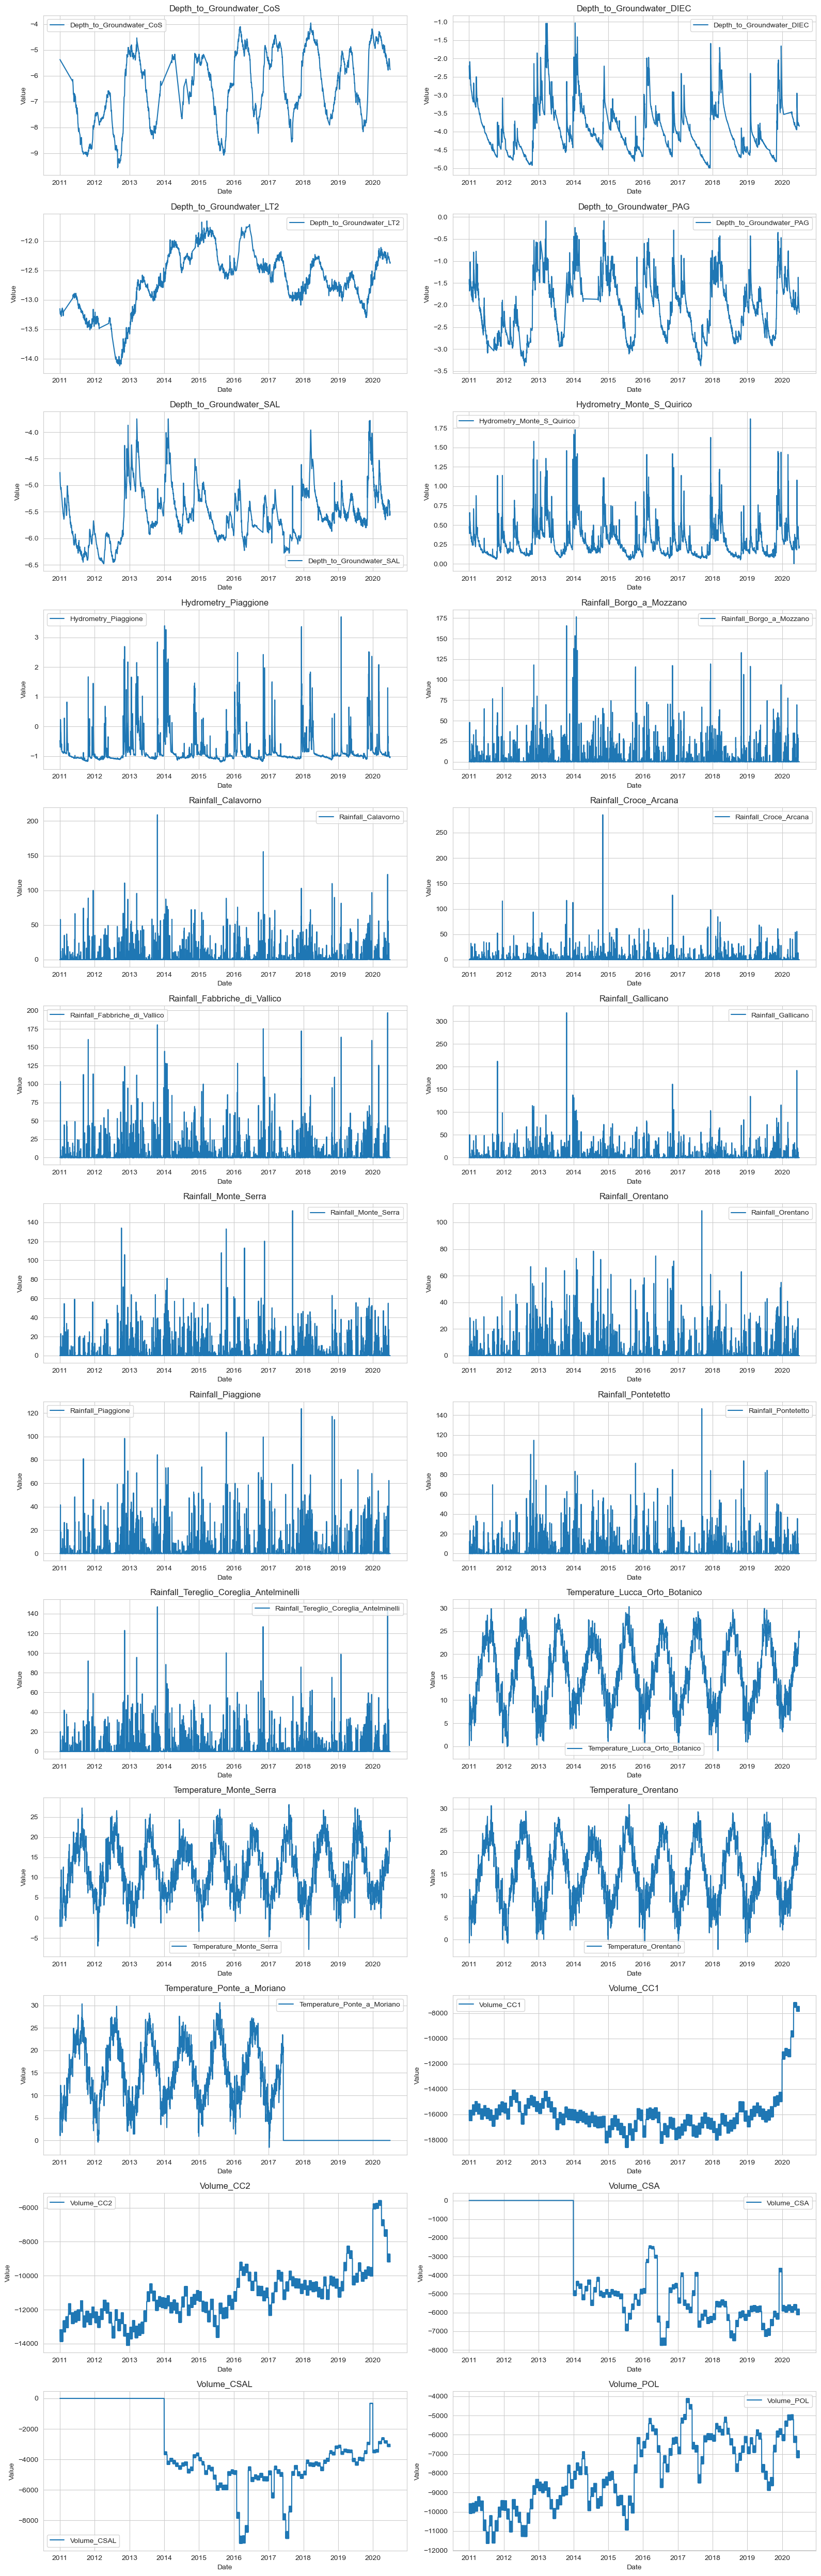

In [109]:
# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])
# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

使用神经网络填充这部分异常值

In [110]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 定义要替换为0并填充的列
columns_to_replace_zero = ['Volume_CSA', 'Volume_CSAL', 'Temperature_Ponte_a_Moriano']

# 复制原始DataFrame以免修改原始数据
df_copy = df.copy()

# 将0替换为NaN
df_copy[columns_to_replace_zero] = df_copy[columns_to_replace_zero].replace(0, np.nan)

# 使用SimpleImputer将NaN值填充为均值
imputer = SimpleImputer(strategy='mean')
df_copy[columns_to_replace_zero] = imputer.fit_transform(df_copy[columns_to_replace_zero])

# 分离特征和目标列
X = df_copy.drop(columns=columns_to_replace_zero)
y = df_copy[columns_to_replace_zero]

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 创建一个简单的神经网络模型
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(columns_to_replace_zero))
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 使用模型进行预测
predicted_values = model.predict(X)

# 将预测值填充回DataFrame
df_filled = df.copy()
df_filled[columns_to_replace_zero] = predicted_values


Epoch 1/50
70/70 [==============================] - 0s 2ms/step - loss: 18707484.0000 - val_loss: 18948598.0000
Epoch 2/50
70/70 [==============================] - 0s 942us/step - loss: 18499236.0000 - val_loss: 18498330.0000
Epoch 3/50
70/70 [==============================] - 0s 964us/step - loss: 17642770.0000 - val_loss: 17064028.0000
Epoch 4/50
70/70 [==============================] - 0s 957us/step - loss: 15621099.0000 - val_loss: 14288360.0000
Epoch 5/50
70/70 [==============================] - 0s 942us/step - loss: 12403956.0000 - val_loss: 10583234.0000
Epoch 6/50
70/70 [==============================] - 0s 928us/step - loss: 8752871.0000 - val_loss: 7087066.0000
Epoch 7/50
70/70 [==============================] - 0s 921us/step - loss: 5834212.5000 - val_loss: 4821005.0000
Epoch 8/50
70/70 [==============================] - 0s 913us/step - loss: 4138386.0000 - val_loss: 3656414.5000
Epoch 9/50
70/70 [==============================] - 0s 899us/step - loss: 3280610.5000 - val_los

观察对比效果

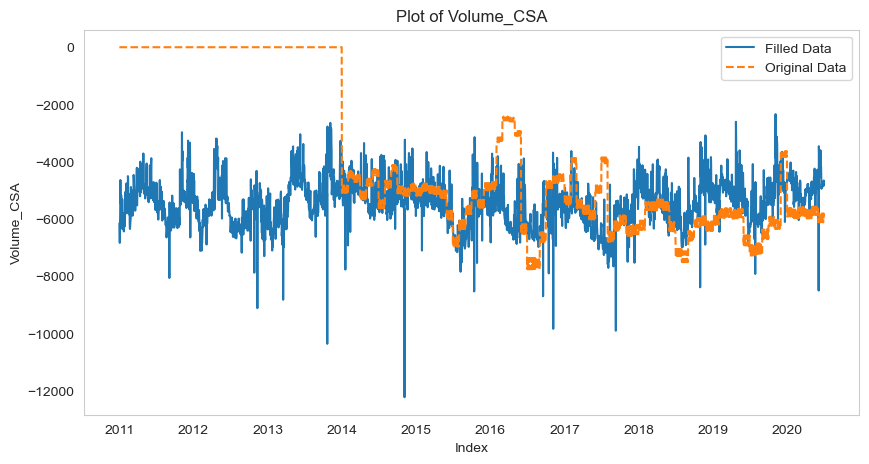

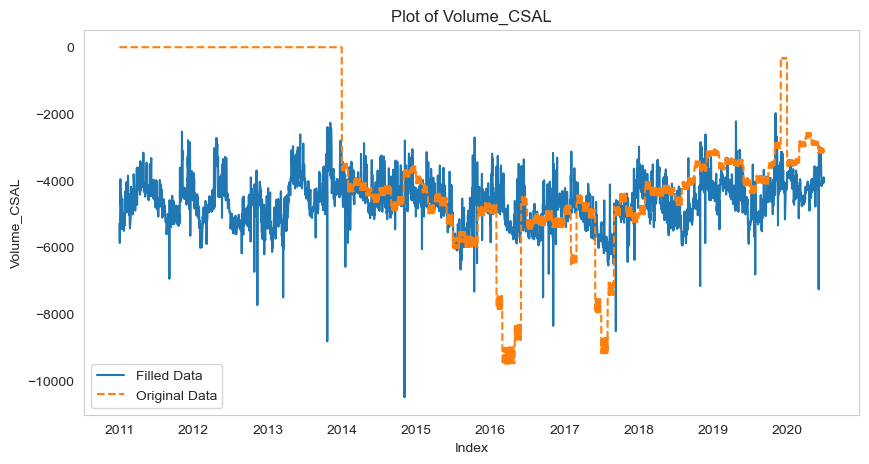

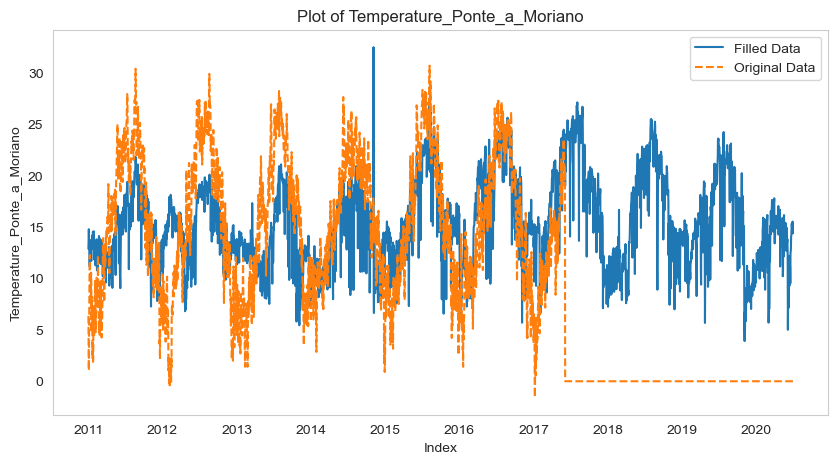

In [111]:
# 遍历每列数据
for column in columns_to_replace_zero:
    plt.figure(figsize=(10, 5))
    plt.plot(df_filled.index, df_filled[column], label='Filled Data', linestyle='-')
    plt.plot(df.index, df[column], label='Original Data', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Plot of {column}')
    plt.legend()
    plt.grid()
    plt.show()

数据预处理基本完成

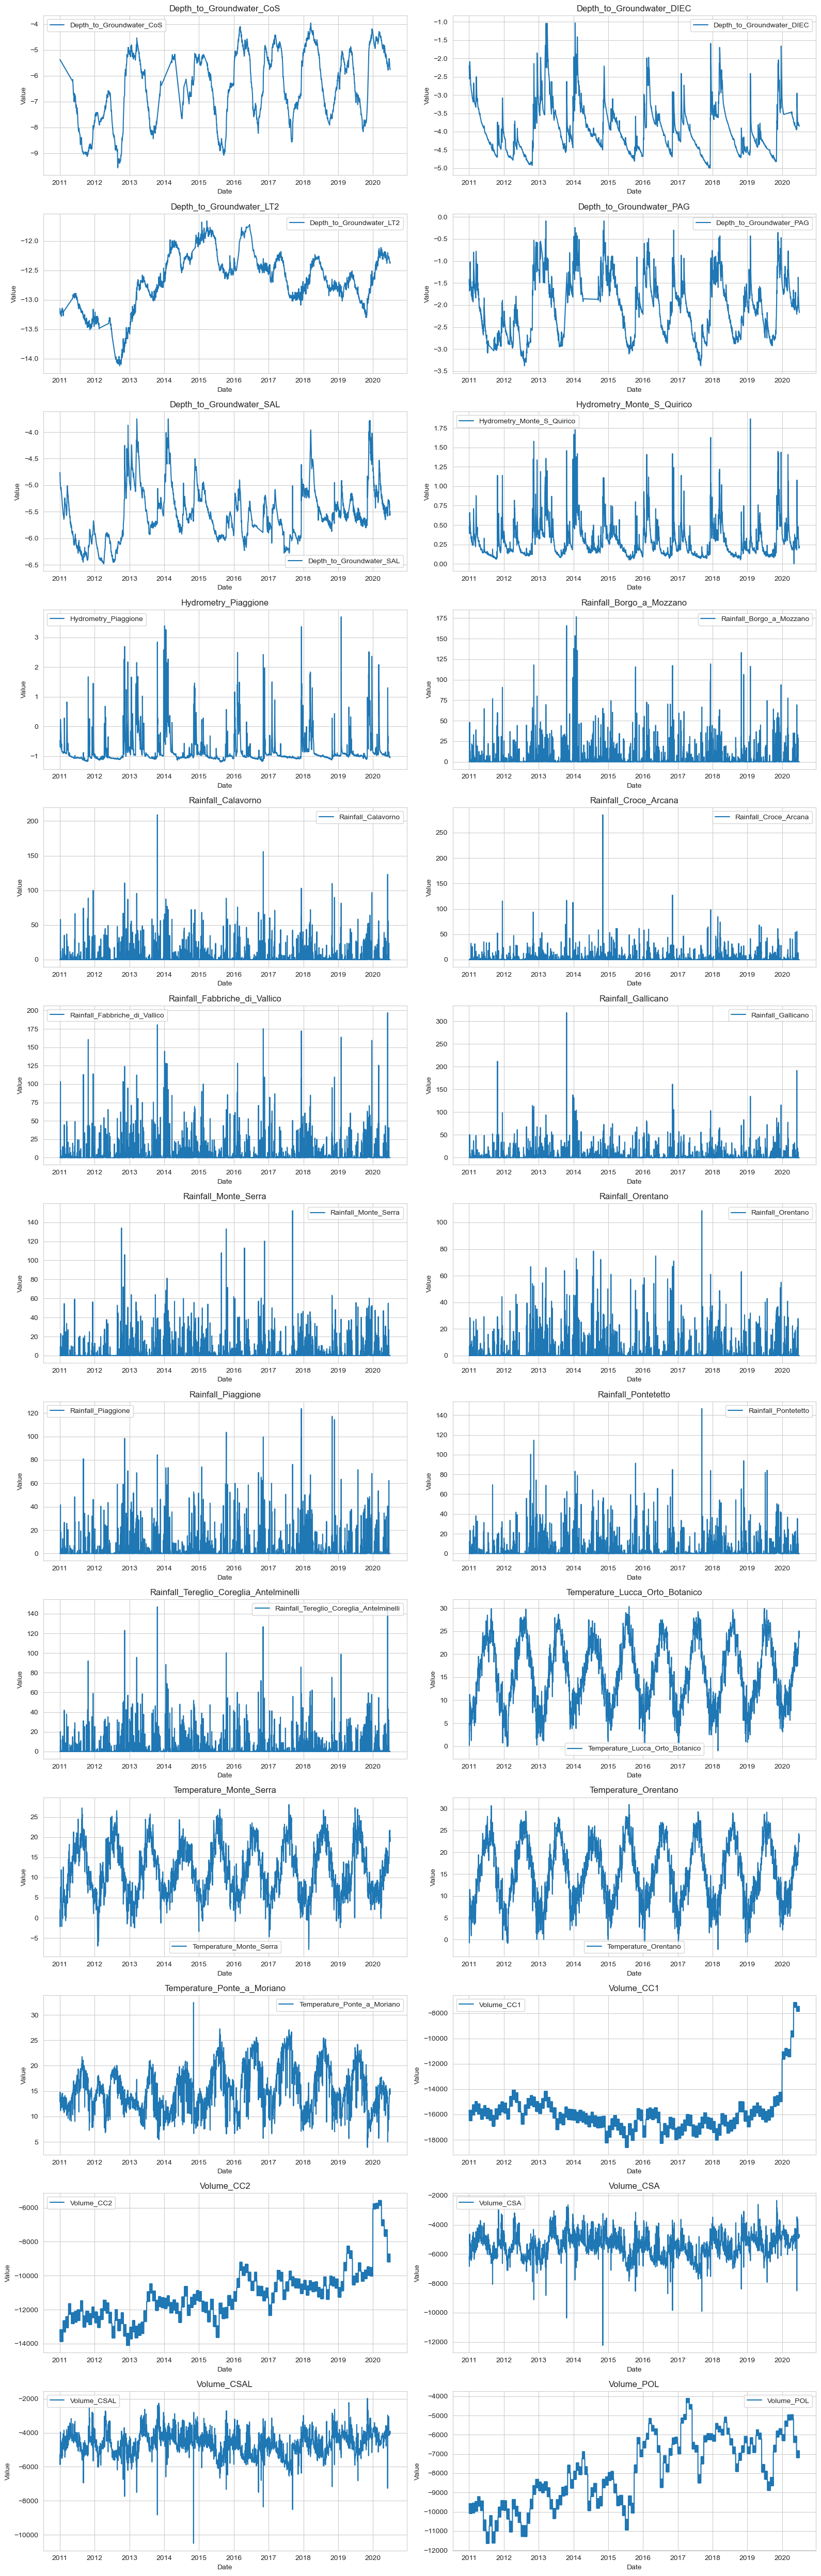

In [113]:
# 获取除了标签列之外的所有数据列
data_columns = df_filled.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df_filled, x=df_filled.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

让我们看看它的箱线图

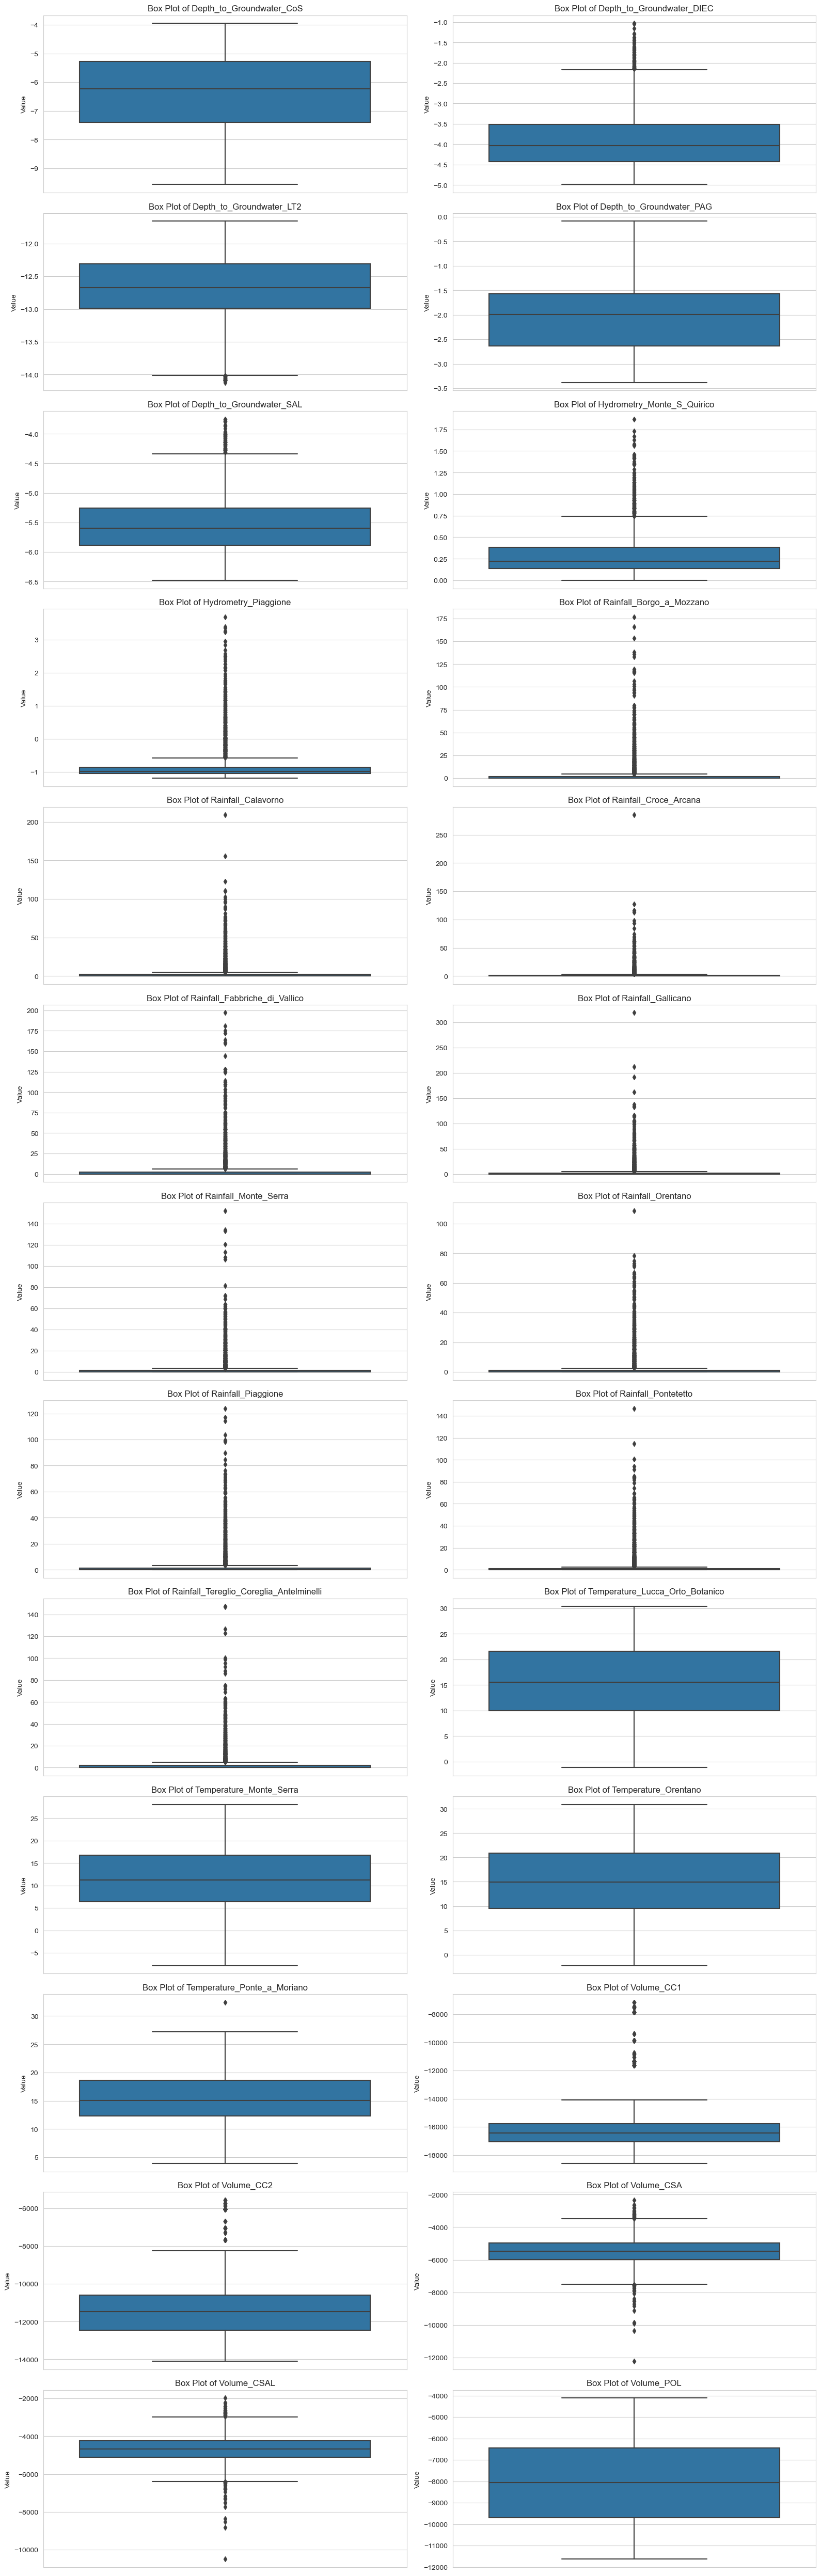

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取除了标签列之外的所有数据列
data_columns = df_filled.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的箱线图
for i, column in enumerate(data_columns):
    plt.subplot(13, 2, i + 1)
    sns.boxplot(data=df_filled, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()
